# ***TITANIC SURVIVAL PREDICTION***

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.metrics import * 
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [103]:
df = pd.read_csv(r"C:\Users\shrut\OneDrive\Desktop\Internship\archive (5)\Titanic-Dataset.csv")

In [105]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## EDA

In [110]:
df.shape

(891, 12)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [114]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [116]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

'''

From the above output, we can derive the following insights:

- Total Entries: The dataset comprises 891 rows.

- Columns: There are 12 columns, with a combination of float, int, and object data types. 
           Converting object types to numerical representations may be necessary for certain analysis 
           and modeling tasks.
  
- Missing Values: Several columns, including 'Age', 'Cabin', and 'Embarked', contain missing values. 
                To address this, we may consider strategies such as imputation or removal of rows/columns
                with missing values to ensure the integrity of our analysis.



'''

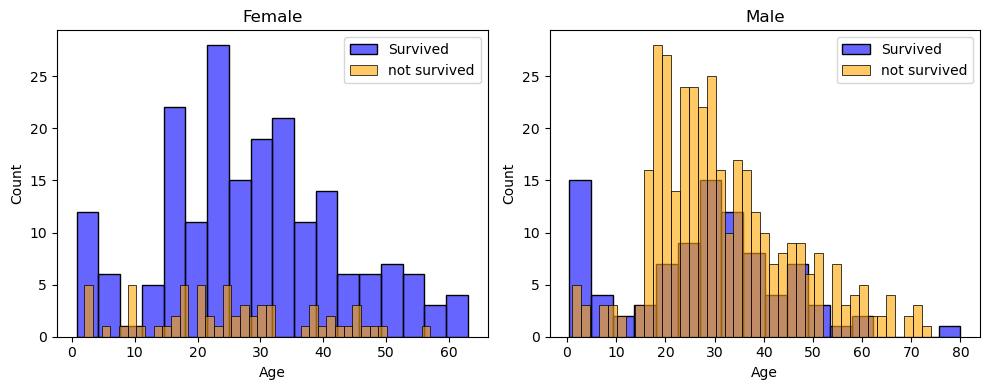

In [121]:
survived = 'Survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

women = df[df['Sex'] == 'female']  # Storing females in a var named as women
men = df[df['Sex'] == 'male']      # Storing males in a var named as men

# For women
ax = sns.histplot(women[women['Survived'] == 1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False, color='blue', alpha=0.6)
ax = sns.histplot(women[women['Survived'] == 0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False, color='orange', alpha=0.6)
ax.legend()
ax.set_title('Female')

# For men
ax = sns.histplot(men[men['Survived'] == 1].Age.dropna(), bins=18, label=survived, ax=axes[1], kde=False, color='blue', alpha=0.6)
ax = sns.histplot(men[men['Survived'] == 0].Age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False, color='orange', alpha=0.6)
ax.legend()
ax.set_title('Male')

plt.tight_layout()
plt.show()


## Model Cleanings 

In [124]:
df.isnull().sum()[df.isnull().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

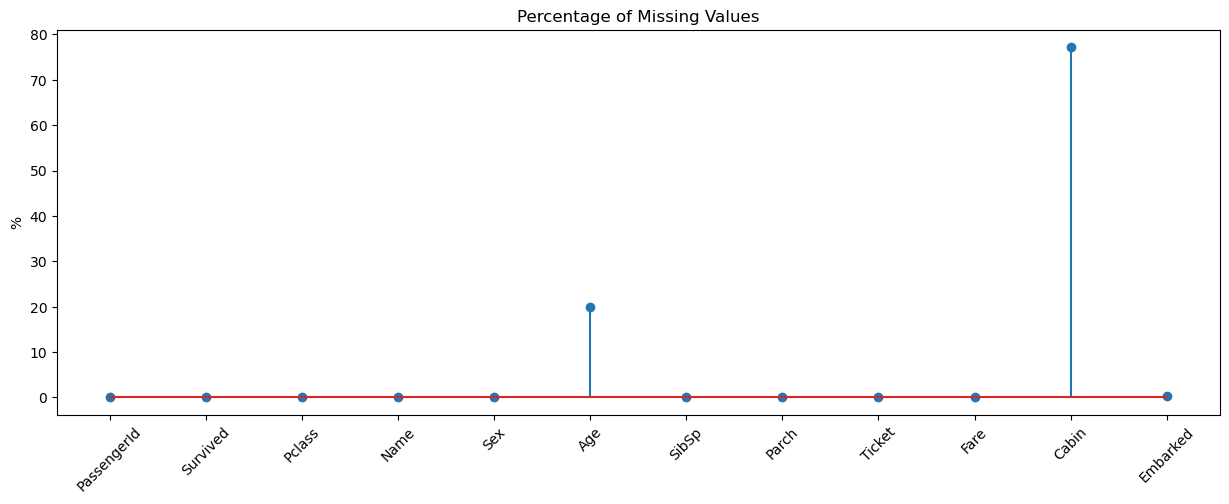

In [126]:
# Visualize the Null values
missing_values_per = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index()
plt.figure(figsize=(15,5))
plt.stem(missing_values_per['index'],missing_values_per[0])
plt.xticks(rotation=45,fontsize=10)
plt.title('Percentage of Missing Values')
plt.ylabel('%')
plt.show()

# Filling the nulls values

In [129]:
df.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [131]:
#Dropping  the “Cabin” column from the data frame as it won’t be of much importance
df = df.drop(columns='Cabin', axis=1)

In [133]:
# Handling missing values in 'Age' by filling with the meam

# Handling missing values in 'Embarked' by filling with S

In [135]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [137]:
df.Age.fillna(df.Age.mean(),inplace=True)
#df.Fare.fillna(df.Fare.mean(),inplace=True)
df.Embarked.fillna("S",inplace=True)
#df.boat.fillna(0,inplace=True)

In [145]:
# drop columns 
#df.drop(columns={'body','home.dest','boat'},inplace=True)

In [147]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [149]:
df.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [153]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [155]:
df.Sex.replace({'male':0, 'female':1}, inplace=True)

In [157]:
df.Embarked.replace({'S':0, 'C':1, 'Q':2}, inplace=True)

In [159]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [163]:
#There are few columns, which are not of much importance in this process. So let's get rid of them.

df = df.drop(columns = ['Name','Ticket'],axis=1)

In [165]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [167]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


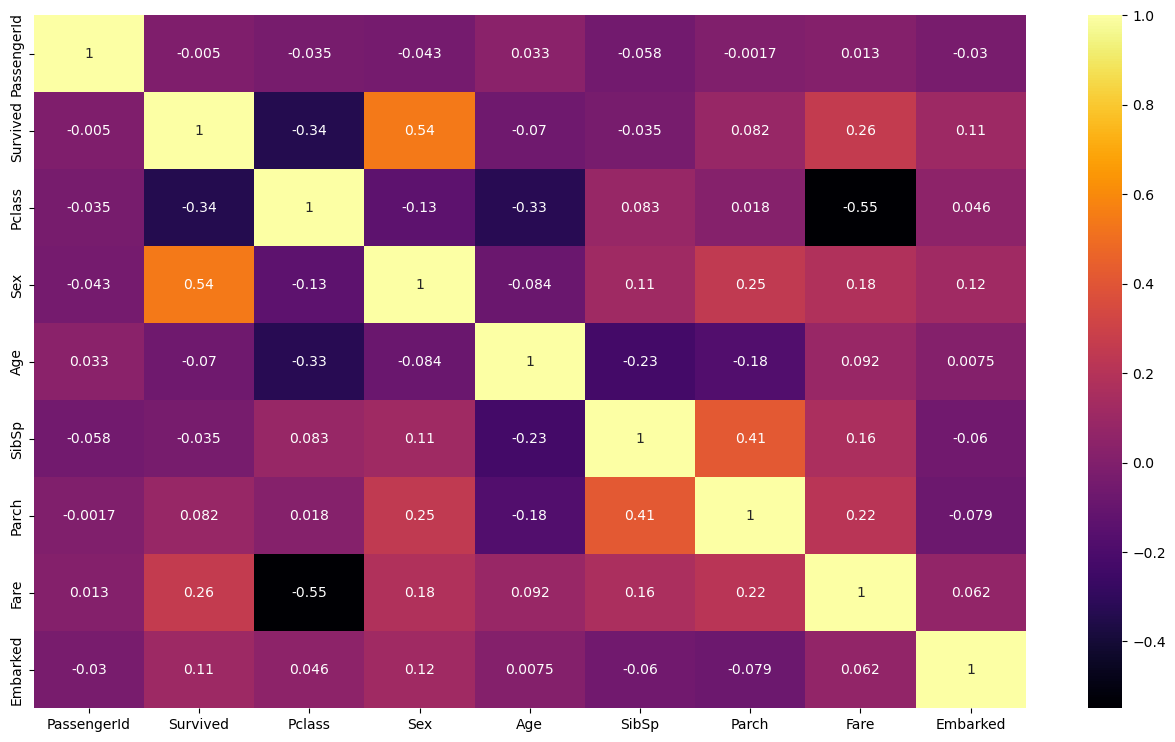

In [169]:
plt.figure(figsize =(16,9))
sns.heatmap(df.corr(), annot = True, cmap = 'inferno')
plt.show()

# Model Building

In [172]:
#importing Library
from sklearn.model_selection import train_test_split

In [174]:
df_train ,df_test = train_test_split(df,test_size=0.20, random_state=121)

In [176]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [178]:
df_train_x = df_train.iloc[:,[0,2,3,4,5,6]] # All columns except the first one as features
df_train_y = df_train.loc[:,'Survived']  # The first column as target variable

df_test_x = df_test.iloc[:,[0,2,3,4,5,6]]
df_test_y = df_test.loc[:,'Survived']  # The first column as target variable

## Logestic Regression

In [181]:
#importing Library

from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression    

In [183]:
logistic = LogisticRegression()
logistic.fit(df_train_x,df_train_y) 

LogisticRegression()

In [185]:
pred_test_logistic = logistic.predict(df_test_x)
confusion_matrix(df_test_y,pred_test_logistic)

array([[91, 16],
       [25, 47]], dtype=int64)

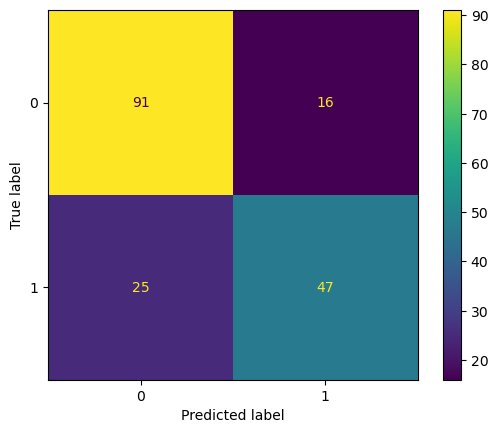

In [187]:
from sklearn.metrics import ConfusionMatrixDisplay
c_matrix=ConfusionMatrixDisplay(confusion_matrix(df_test_y, pred_test_logistic))
c_matrix.plot(cmap = plt.cm.viridis)
plt.show()

In [189]:
Accuarcy_log = accuracy_score(df_test_y,pred_test_logistic)
print(classification_report(df_test_y,pred_test_logistic))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       107
           1       0.75      0.65      0.70        72

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.77      0.77       179



In [191]:
pred_test_proba_logistic = logistic.predict_proba(df_test_x)[:,1]

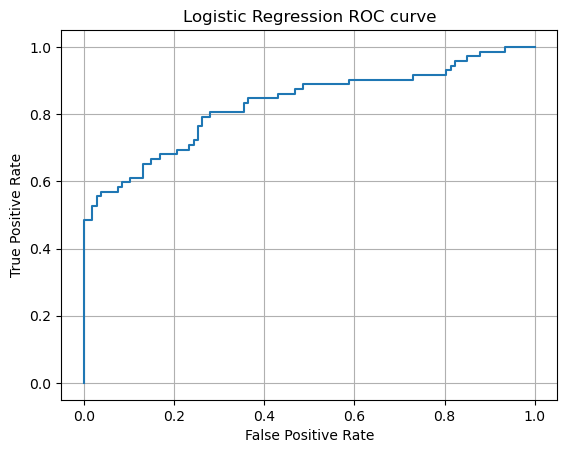

In [193]:
# Fpr vs Tpr curve plot

fpr, tpr, _ = roc_curve(df_test_y, pred_test_proba_logistic)
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.grid()
plt.show()

In [195]:
score_log = cross_val_score(logistic, df_train_x, df_train_y, cv= 8)
score_log* 100

array([77.52808989, 80.8988764 , 82.02247191, 75.28089888, 80.8988764 ,
       84.26966292, 82.02247191, 74.15730337])

In [196]:
l1 = score_log.mean()*100
print(l1)

79.63483146067416


## Decision Tree 

In [200]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()

dec.fit(df_train_x,df_train_y)

DecisionTreeClassifier()

In [202]:
pred_test_tree = dec.predict(df_test_x)
confusion_matrix(df_test_y,pred_test_tree)

array([[83, 24],
       [26, 46]], dtype=int64)

In [204]:
Accuarcy_dec = accuracy_score(df_test_y,pred_test_tree)

print(classification_report(df_test_y,pred_test_tree))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       107
           1       0.66      0.64      0.65        72

    accuracy                           0.72       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.72      0.72       179



## Random Forest

In [207]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()

random.fit(df_train_x,df_train_y)

RandomForestClassifier()

In [208]:
pred_test_random = random.predict(df_test_x)
confusion_matrix(df_test_y, pred_test_random)

array([[96, 11],
       [27, 45]], dtype=int64)

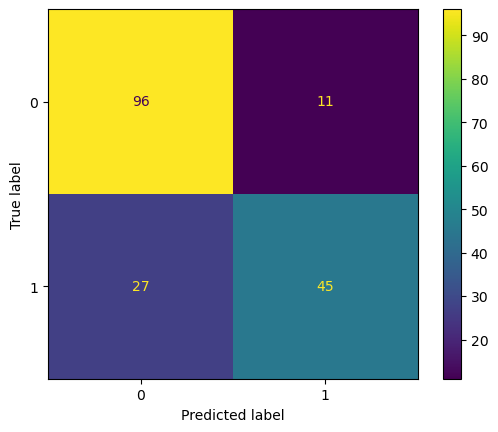

In [211]:
c_matrix_decision = ConfusionMatrixDisplay(confusion_matrix(df_test_y, pred_test_random))
c_matrix_decision.plot(cmap = plt.cm.viridis)
plt.show()

In [213]:
acc_crf = accuracy_score(df_test_y, pred_test_random)
print(classification_report(df_test_y , pred_test_random))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       107
           1       0.80      0.62      0.70        72

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



# Doing Hyper Parameter Tuning on RF

In [216]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter space for Random Forest
search_rf = {
    "n_estimators": [300, 400, 500],    # Number of trees in the forest
    "max_depth": range(40, 50),               # Maximum depth of the trees (up to but not including 21)
    "min_samples_split": range(2, 10)        # Minimum number of samples required to be at a leaf node
}

# Initialize Random Forest model
rf = RandomForestRegressor()

# Initialize RandomizedSearchCV with parameter distributions
random_search_rf = RandomizedSearchCV(rf, param_distributions=search_rf, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search_rf.fit(df_train_x, df_train_y)

# Get the best hyperparameters
best_params_rf = random_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

Best Hyperparameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 9, 'max_depth': 45}


In [217]:
'''

The Best Hyperparameters Are:

n_estimators     : 300
min_samples_split: 9
max_depth        : 43

'''

'\n\nThe Best Hyperparameters Are:\n\nn_estimators     : 300\nmin_samples_split: 9\nmax_depth        : 43\n\n'

In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Define the RandomForestClassifier with the desired parameters
new_rf = RandomForestClassifier(n_estimators=300, min_samples_split=9, max_depth=43)

# Fit the model
new_rf.fit(df_train_x,df_train_y)

# Evaluate the Random Forest model
pred_new_rf = random.predict(df_test_x)

# Print the confusion matrix and classification report
print(confusion_matrix(df_test_y, pred_new_rf))            
print(classification_report(df_test_y, pred_new_rf))

[[96 11]
 [27 45]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       107
           1       0.80      0.62      0.70        72

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [219]:
rf_new_accuracy = accuracy_score(df_test_y, pred_new_rf)
print("Random Forest Accuracy = ",rf_new_accuracy)

Random Forest Accuracy =  0.7877094972067039


# Comparing Random Forest Accuracy before and after HPT  

In [225]:
print("Before HPT Accuracy = ", acc_crf)
print("After  HPT Accuracy = ", rf_new_accuracy)

Before HPT Accuracy =  0.7877094972067039
After  HPT Accuracy =  0.7877094972067039


In [227]:
#Accuarcy has Same after Hyper Parameter Tuning

## Comparing all Results

In [230]:
print("Logestic Regression Accuracy = ", Accuarcy_log)
print("Decision Tree Accuracy       = ", Accuarcy_dec)
print("Random Forest Accuracy       = ", acc_crf)
print("Random Forest HPT Accuracy   = ", rf_new_accuracy)

Logestic Regression Accuracy =  0.770949720670391
Decision Tree Accuracy       =  0.7206703910614525
Random Forest Accuracy       =  0.7877094972067039
Random Forest HPT Accuracy   =  0.7877094972067039


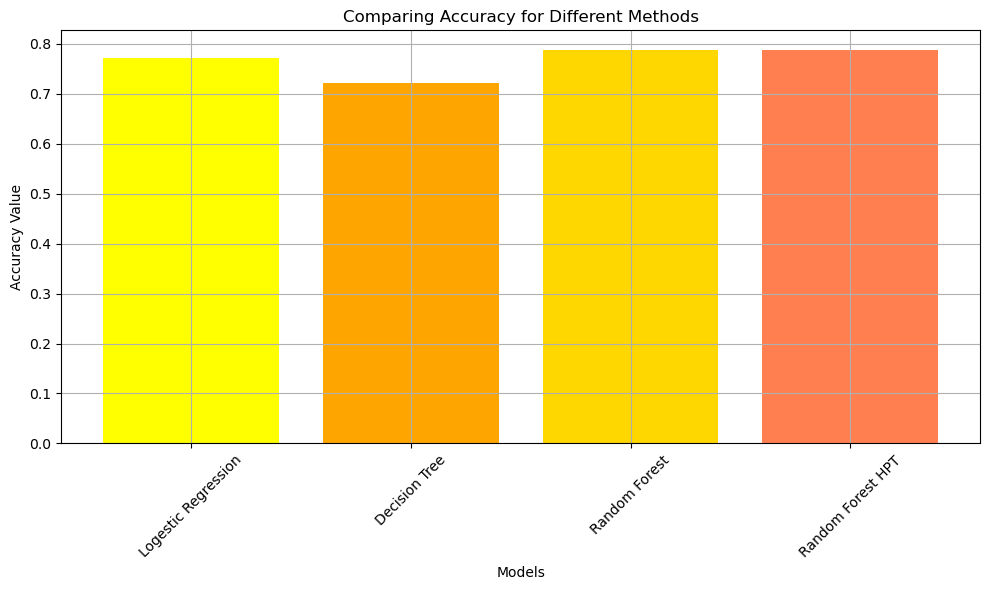

In [232]:
# MSE values for each method on test data
methods     = ['Logestic Regression', 'Decision Tree', 'Random Forest', 'Random Forest HPT']
mse_values = [Accuarcy_log,Accuarcy_dec, acc_crf, rf_new_accuracy]

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(methods, mse_values, color=['yellow', 'orange', 'gold', 'coral'])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Value')
plt.title('Comparing Accuracy for Different Methods')
plt.xticks(rotation=45)
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

'''

After experimenting with various algorithms, including Decision Tree and Random Forest, we can conclude that 
the Random Forest model, delivered the best results for predicting Titanic survival. 

This model showed superior accuracy and performance across several evaluation metrics compared to others.

'''